# Simple Neural Network
Test backpropagation algorithm to create an XOR gate

In [1]:
import numpy as np

In [3]:
"""
X1 X2 AND
0  0  0
1. 0  0
0  1. 0
1. 1. 1

X1 X2 XOR
0  0  0
1. 0  1
0  1. 1
1. 1. 0
"""

'\nX1 X2 AND\n0  0  0\n1. 0  0\n0  1. 0\n1. 1. 1\n\nX1 X2 XOR\n0  0  0\n1. 0  1\n0  1. 1\n1. 1. 0\n'

In [14]:
class neural_network():
    """ Neural network class to demonstrante XOR gate classification
    """
    
    def __init__(self, n_inputs, n_neurons, n_outputs, lr, rand_seed=5):
        """ Neural network class
        
        Args:
            - n_inputs (int): Number of inputs of the network
            - n_neurons (int): Number of neurons in the hidden layer
            - n_outputs (int): Number of outputs of the network
            - lr (float): Learning rate
            - rand_seed (int): Pseudo-random seed for weight initialization
        """
        np.random.seed(rand_seed)
        self.lr = lr
        
        self.w1 = np.random.randn(n_neurons, n_inputs)
        self.b1 = np.zeros((n_neurons, 1))
        
        self.w2 = np.random.randn(n_outputs, n_neurons)
        self.b2 = np.zeros((n_outputs, 1))
        
        self.a1 = 0
        self.a2 = 0
        
        self.h = []
        self.cost_h = []
        
    def sigmoid(self,x):
        """ Sigmoid function
        """
        return 1/(1 + np.exp(-x))
    
    
    def propagate(self, x):
        """ Forward propagate the input values through the network
        
        Hidden and output layer outputs are stored in a1 and a2 members
        respectively.
        """
        # first layer
        z1 = np.dot(self.w1, x) + self.b1
        self.a1 = np.tanh(z1)
        
        # output layer
        z2 = np.dot(self.w2, self.a1) + self.b2
        self.a2 = self.sigmoid(z2)
        
        
        
    def cost(self, y, m):
        """ Compute the cost value of the current predictions of the network
        """
        cost = -np.sum(np.multiply(y, np.log(self.a2)) +  np.multiply(1-y, np.log(1-self.a2)))/m
        
        # keep track of cost values
        self.cost_h.append(cost)
        
        return np.squeeze(cost)
    
    
    def backpropagation(self, x, y, m):
        """ Apply backpropagation algorithm
        """
        # keep track of w values
        w1 = self.w1.copy()
        w2 = self.w2.copy()
        self.h.append([w1,w2])
        

        dz2 = self.a2 - y
        
        dw2 = np.dot(dz2, self.a1.T)/m      
        db2 = np.sum(dz2, axis=1, keepdims=True)/m

        dz1 = np.multiply(np.dot(self.w2.T, dz2), 1-np.power(self.a1, 2))
        
        dw1 = np.dot(dz1, x.T)/m
        db1 = np.sum(dz1, axis=1, keepdims=True)/m
        
        # update
        self.w1 += -self.lr * dw1
        self.b1 += -self.lr * db1
        
        self.w2 += -self.lr * dw2
        self.b2 += -self.lr * db2 
    
    
    def train(self, x, y, epochs):
        """ Train neural network
        Args:
            - x (np.array): Array of feature vectors
            - y (np.array): Array of labels
            - epochs (int): Number of iterations for training
        """
        # get number of samples
        m = x.shape[1]

        for i in range(0, epochs+1):
            self.propagate(x)
            cost = self.cost(y, m)
            self.backpropagation(x, y, m)
            
            if(i%100 == 0):
                print('Epoch {0:>4}  Cost {1:>10}'.format(i, round(cost,6)))


    def predict(self, x):
        """ Predict label of feature vector
        Args:
            - x (np.array): Feature vector
        """
        self.propagate(x)
        y_ = np.squeeze(self.a2)

        # apply threslhold to output
        if(y_ >= 0.5):
            y_pred = 1
        else:
            y_pred = 0

        return y_pred


    def get_weights(self):
        """ Output current internal state of network
        
        Prints w and b values of each layer and neuron
        """
        
        print('Hidden layers')
        for i in range(len(self.w1)):
            print(i+1,self.w1[i],self.b1[i])
        
        print()
        
        print('Output layers')
        for i in range(len(self.w2)):
            print(i+1,self.w2[i],self.b2[i])
    
    
    def get_history(self):
        """ Get W and cost registers accumulated during training.
        Returns:
            h,cost_h (tuple of lists):  h: List of lists, one list per layer.
                                        Cost: A list of cost values.
        """
        return self.h, self.cost_h

In [4]:
# create XOR dataset

X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]])

Y = np.array([[0, 1, 1, 0]])

epochs = 1000
lr = 0.5

# configure architecture
""" 
x1-\-/- P1 -|
    X       P3 - output
x2-/-\- P2 -|
"""
input_size = 2
hidden_neurons = 2
output_size = 1

In [16]:
n = neural_network(input_size, hidden_neurons, output_size, lr, rand_seed=2)
n.get_weights()

Hidden layers
1 [-0.41675785 -0.05626683] [0.]
2 [-2.1361961   1.64027081] [0.]

Output layers
1 [-1.79343559 -0.84174737] [0.]


In [17]:
n.train(X, Y, epochs)

Epoch    0  Cost   0.856267
Epoch  100  Cost    0.14135
Epoch  200  Cost   0.046247
Epoch  300  Cost   0.027016
Epoch  400  Cost   0.018972
Epoch  500  Cost   0.014584
Epoch  600  Cost    0.01183
Epoch  700  Cost   0.009944
Epoch  800  Cost   0.008573
Epoch  900  Cost   0.007531
Epoch 1000  Cost   0.006714


In [18]:
n.get_weights()

Hidden layers
1 [ 3.36243112 -3.23921699] [1.54485126]
2 [-3.62709124  3.74377535] [1.74702985]

Output layers
1 [-5.59814503 -5.54874364] [5.03778435]


In [19]:
# test XOR model
print('X1 X2 | PY |  Y')
print('---------------')
for i in range(4):
    x1 = X[0][i]
    x2 = X[1][i]
    y = n.predict(np.array([[x1], [x2]]))
    print('{0}  {1}  | {2}  | {3}'.format(x1,x2,y, Y[0][i]==y))

X1 X2 | PY |  Y
---------------
0  0  | 0  | True
0  1  | 1  | True
1  0  | 1  | True
1  1  | 0  | True


In [20]:
h,c = n.get_history()

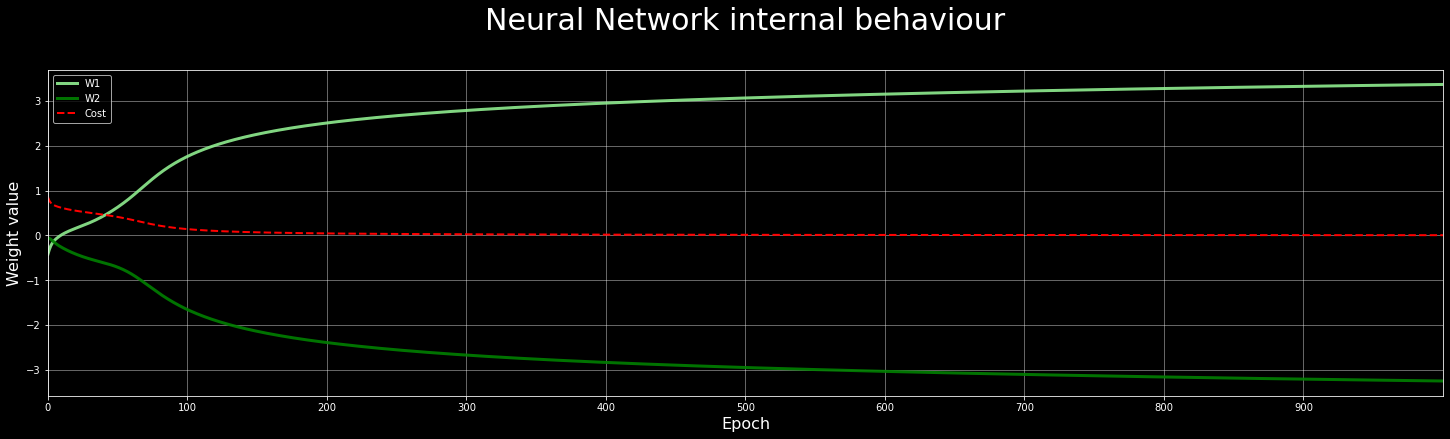

In [23]:
# configure plot
layer  = 0
neuron = 0


w1 = [] ; w2 = []
for epoch in range(epochs):
    w1.append(h[epoch][layer][neuron][0])
    w2.append(h[epoch][layer][neuron][1])

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(111)
ax.plot(w1, linewidth=3,label='W1',alpha=0.9,color='lightgreen')
ax.plot(w2, linewidth=3,label='W2',alpha=0.9,color='green')
ax.plot(c, linewidth=2, c='r',linestyle='--',label='Cost')
ax.set_ylabel('Weight value', fontsize=16)
ax.set_xlabel('Epoch', fontsize=16)
ax.grid(alpha=0.5)
ax.xaxis.set_ticks(np.arange(0, epochs, 100))
ax.set_xlim(0, epochs)
ax.legend()
ax.set_title('Neural Network internal behaviour\n',fontsize=30)
plt.show()